<a href="https://colab.research.google.com/github/samhithaPeddireddy/Samhitha_Info5502_Spring2022/blob/Python-and-Machine-Learning/MachineLearning_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
data_monet=pd.read_csv('/content/monet-2.csv')

In [4]:
data_monet_df=pd.DataFrame(data_monet)

In [5]:
data_monet

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2
...,...,...,...,...,...,...
425,5.282500,25.6,39.4,1,375,1
426,9.352500,25.9,39.6,1,375,2
427,8.252500,25.6,39.6,1,375,1
428,3.410000,25.6,39.4,1,386,2


In [6]:
data_monet_df["SIZE"] = data_monet_df["HEIGHT"] * data_monet_df["WIDTH"] 
data_monet_df.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,SIZE
0,3.993780,21.3,25.6,1,1,1,545.28
1,8.800000,31.9,25.6,1,2,2,816.64
2,0.131694,6.9,15.9,0,3,3,109.71
3,2.037500,25.7,32.0,1,4,2,822.40
4,1.487500,25.7,32.0,1,4,2,822.40


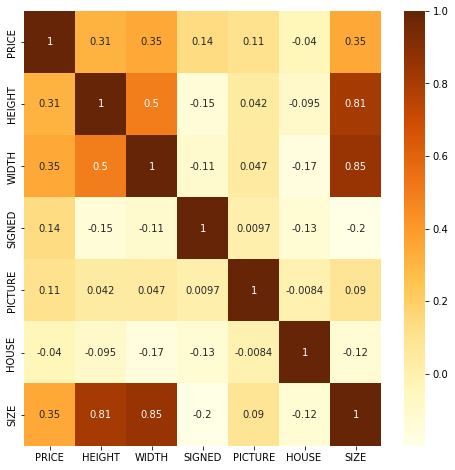

In [15]:
# finding corelation between the data
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize = (8,8))
sns.heatmap(data_monet_df.corr(), cmap='YlOrBr' , annot=True)
plt.show()

From the above heatmap, we can see that price is related size,width and height.

**Model 1:**

*Creating a model using price as dependent variable and Size as the independent variable*

In [18]:
# Split the data into test and train.
# Considering training/test as 80/20.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_monet_df[['SIZE']], data_monet_df['PRICE'], train_size = 0.8)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((344, 1), (86, 1), (344,), (86,))

In [19]:
# builing Linear Regression

from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
mode11  = lr.fit (X_train, y_train) # Fit the model into the training data

In [20]:
y_test_pred = mode11.predict (X_test) # Predicting the y value using x for test data.

In [26]:
y_train

136    0.852500
228    0.690000
426    9.352500
268    2.141580
34     0.156500
         ...   
190    0.550000
51     1.133311
389    0.310500
221    3.850000
158    1.276050
Name: PRICE, Length: 344, dtype: float64

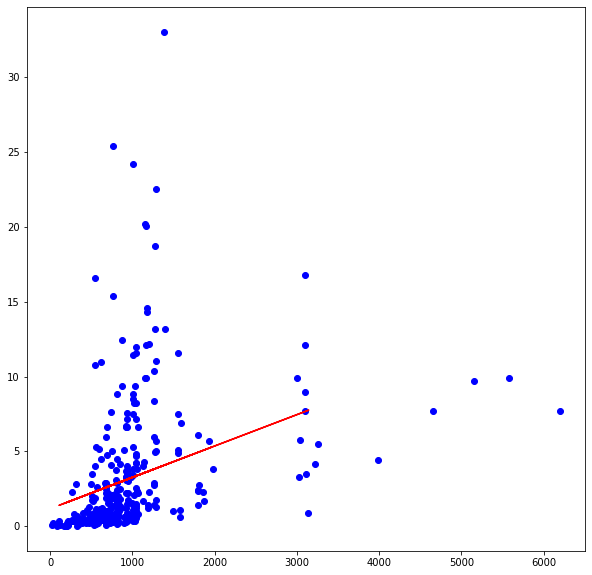

In [27]:
plt.subplots(figsize = (10,10))
plt.scatter(x = X_train['SIZE'], y = y_train,color='blue')
plt.plot(X_test,y_test_pred, color='red',label="Fitted Line")
plt.show();

In [30]:
# Calculate the error of the prediction with test data.
# Finding mean square error, R2_Score and Root mean square error.

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error (y_test, y_test_pred)
print('MSE for the test set: {:.2f}'.format(mse))

r2 = r2_score (y_test, y_test_pred)
print('R2_Score for the test set: {:.2f}'.format(r2))

import math 
RMSE = math.sqrt(mse)
print('RMSE for the test set: {:.2f}'.format(RMSE))


MSE for the test set: 10.06
R2_Score for the test set: 0.14
RMSE for the test set: 3.17


**Model 2:**
*Creating a model using Width as the independent variable and Price as dependent variable*

In [33]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data_monet_df[['WIDTH']], data_monet_df['PRICE'], train_size = 0.8)

X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((344, 1), (86, 1), (344,), (86,))

In [48]:
# builing Linear Regression
mode12  = lr.fit (X_train2, y_train2) # Fit the model into the training data

In [36]:
y_test_pred2 = mode12.predict (X_test2) # Predicting the y value using x for test data.

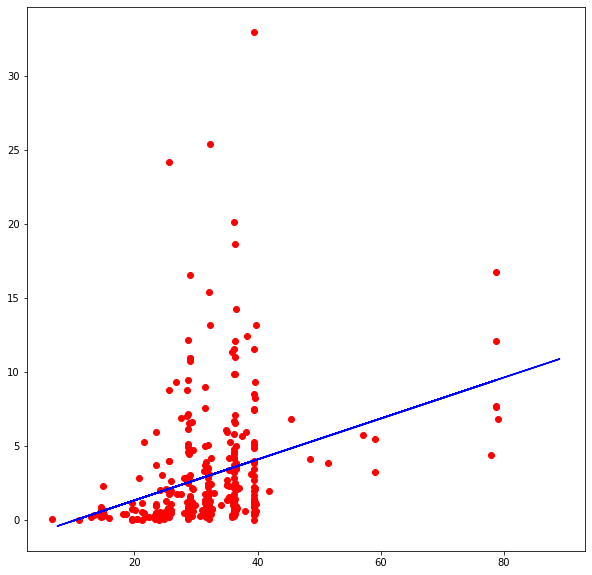

In [39]:
plt.subplots(figsize = (10,10))
plt.scatter(x = X_train2['WIDTH'], y = y_train2,color='red')
plt.plot(X_test2,y_test_pred2, color='BLUE',label="Fitted Line")
plt.show();

In [50]:
# Calculate the error of the prediction with test data.
# Finding mean square error, R2_Score and Root mean square error.

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error (y_test2, y_test_pred2)
print('MSE for the test set: {:.2f}'.format(mse))

r2 = r2_score (y_test2, y_test_pred2)
print('R2_Score for the test set: {:.2f}'.format(r2))

import math 
RMSE = math.sqrt(mse)
print('RMSE for the test set: {:.2f}'.format(RMSE))

MSE for the test set: 19.37
R2_Score for the test set: 0.17
RMSE for the test set: 4.40


**Model 3: Multivariate Linear Regression model**

In [51]:
data_monet_df.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,SIZE
0,3.993780,21.3,25.6,1,1,1,545.28
1,8.800000,31.9,25.6,1,2,2,816.64
2,0.131694,6.9,15.9,0,3,3,109.71
3,2.037500,25.7,32.0,1,4,2,822.40
4,1.487500,25.7,32.0,1,4,2,822.40


In [65]:
data_monet_df.iloc[:,1:].head()

,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,SIZE
0,21.3,25.6,1,1,1,545.28
1,31.9,25.6,1,2,2,816.64
2,6.9,15.9,0,3,3,109.71
3,25.7,32.0,1,4,2,822.40
4,25.7,32.0,1,4,2,822.40


In [56]:
data_monet_df.iloc[:,[0]]

,PRICE
0,3.993780
1,8.800000
2,0.131694
3,2.037500
4,1.487500
...,...
425,5.282500
426,9.352500
427,8.252500
428,3.410000


In [55]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(data_monet_df.iloc[:,1:].values, data_monet_df.iloc[:,[0]].values, train_size = 0.8)

In [68]:
from sklearn.pipeline import make_pipeline
lr_normalized=LinearRegression(fit_intercept=True,normalize=True)

In [69]:
model3=lr_normalized.fit(X_train3,y_train3)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [70]:
y_test_pred3 = model3.predict (X_test3)

In [71]:
# Calculate the error of the prediction with test data.
# Finding mean square error, R2_Score and Root mean square error.

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error (y_test3, y_test_pred3)
print('MSE for the test set: {:.2f}'.format(mse))

r2 = r2_score (y_test3, y_test_pred3)
print('R2_Score for the test set: {:.2f}'.format(r2))

import math 
RMSE = math.sqrt(mse)
print('RMSE for the test set: {:.2f}'.format(RMSE))

MSE for the test set: 12.51
R2_Score for the test set: 0.21
RMSE for the test set: 3.54
